In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['sci.med', 'sci.space', 'sci.electronics']
newsgroups = fetch_20newsgroups(subset ='train', categories = categories )
documents = newsgroups.data
targets = newsgroups.target
target_names = [ newsgroups.target_names [ i ] for i in targets ]

In [ ]:
def explain_sample(sample_index):
    print("Content:", documents[sample_index])
    print("Target:", targets[sample_index])
    print("Target Name:", target_names[targets[sample_index]])
explain_sample(1)

Content: From: markz@ssc.com (Mark Zenier)
Subject: Re: Can I use a CD4052 analog multiplexer for digital signals?
Organization: SSC, Inc.,  Seattle, WA
X-Newsreader: TIN [version 1.1 PL6]
Lines: 13

Tall Cool One (rky57514@uxa.cso.uiuc.edu) wrote:
: As the subject says - Can I use a 4052 for digital signals?  I don't see
: why it couldn't handle digital signals, but I could be wrong.  Anyone have
: any advice?  Thanks.

The switches have a non-negligable on resistance (up to 1k ohm when
powered by 5 volts) and a maximum current and a Maximum Static
Voltage Across Switch.  Not a good bet for TTL.  Should work for
CMOS, but slow things down a bit.  There are 74HC versions that
have better specs. but lower max voltage.

Mark Zenier  markz@ssc.wa.com  markz@ssc.com  


Target: 0
Target Name: sci.space


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer="word", max_features=5000 , stop_words ='english')
doc_term_matrix = vectorizer.fit_transform(documents)

print(doc_term_matrix)
print("Shape of doc_term_matrix :", doc_term_matrix.shape) # Should show (1778 , 5000)

  (0, 4329)	2
  (0, 1545)	2
  (0, 3884)	1
  (0, 4341)	1
  (0, 4197)	2
  (0, 1284)	1
  (0, 3798)	1
  (0, 3222)	1
  (0, 4465)	1
  (0, 3978)	1
  (0, 2352)	1
  (0, 595)	1
  (0, 2795)	1
  (0, 2632)	1
  (0, 37)	1
  (0, 916)	1
  (0, 3863)	1
  (0, 4945)	1
  (0, 2661)	1
  (0, 4128)	1
  (0, 3002)	1
  (0, 2448)	2
  (0, 3067)	1
  (0, 3979)	1
  (0, 1897)	1
  :	:
  (1777, 445)	1
  (1777, 3041)	1
  (1777, 1778)	1
  (1777, 168)	1
  (1777, 2951)	1
  (1777, 3602)	1
  (1777, 4239)	6
  (1777, 4923)	2
  (1777, 4101)	1
  (1777, 4752)	5
  (1777, 1501)	1
  (1777, 3499)	1
  (1777, 1754)	2
  (1777, 3517)	3
  (1777, 2327)	4
  (1777, 4298)	1
  (1777, 1221)	4
  (1777, 422)	2
  (1777, 4016)	1
  (1777, 3909)	1
  (1777, 2380)	1
  (1777, 3405)	1
  (1777, 33)	1
  (1777, 2599)	3
  (1777, 2326)	4
Shape of doc_term_matrix : (1778, 5000)


In [ ]:
from sklearn.decomposition import TruncatedSVD

# Initialize Truncated SVD with desired number of components (e.g. , 500)
n_components = 500
svd_model = TruncatedSVD(n_components, random_state=42)

# Fit and transform the document - term matrix with Truncated SVD
reduced_matrix = svd_model.fit_transform(doc_term_matrix)

print("Shape of reduced_matrix :", reduced_matrix.shape ) # Should show (1778 , 500)
print(reduced_matrix)


Shape of reduced_matrix : (1778, 500)
[[ 1.64459366  1.61776283 -1.34882036 ... -0.0287639   0.01983171
   0.14191809]
 [ 2.22501222  0.27350545 -0.708378   ... -0.62281437 -0.40160488
   0.01052423]
 [ 2.23028696  1.3166558   0.8475239  ... -0.17815737 -1.0206024
  -0.1149342 ]
 ...
 [ 1.99308942  1.37887859 -0.81672493 ... -0.2373439  -0.19640517
   0.19422455]
 [ 3.72315466  0.97569562 -0.99778319 ...  0.23062184  0.13688346
  -0.01031844]
 [ 3.67839368  1.16490779 -0.80650865 ...  0.00522368  0.0467522
   0.11342086]]


0.9313946088668047


Text(0, 0.5, 'Explained Variance Ratio')

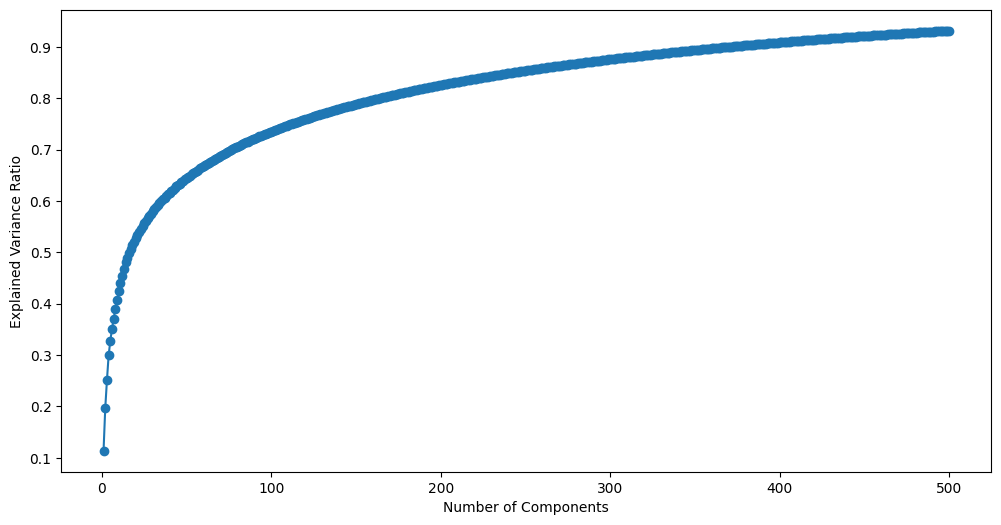

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print(np.sum(svd_model.explained_variance_ratio_[:]))
#print(svd_model.explained_variance_ratio_[:])

sum=0.0
liste_cumu = []
for i in range(500):
    sum += float(svd_model.explained_variance_ratio_[i])
    liste_cumu.append(sum)


plt.figure(figsize=(12, 6))
plt.plot(range(1, len(liste_cumu) + 1), liste_cumu, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')


['sci.electronics', 'sci.med', 'sci.space']


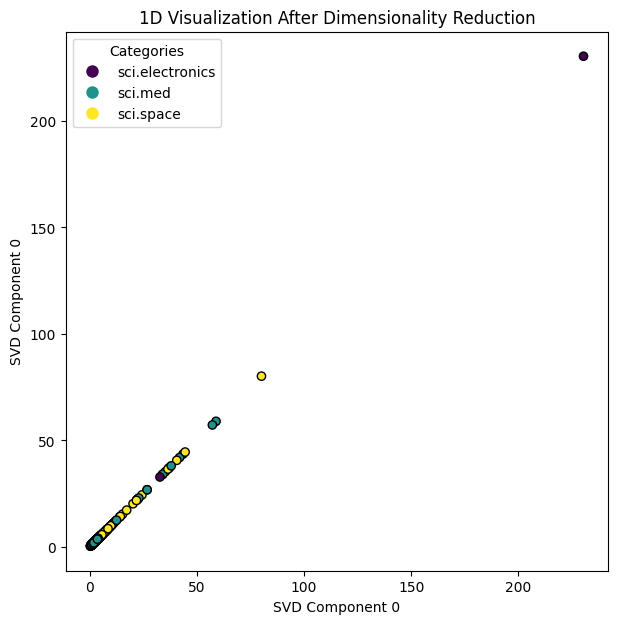

In [ ]:
print(newsgroups.target_names)

legend_labels = {i: name for i, name in enumerate(newsgroups.target_names)}

plt.figure(figsize=(7, 7))
plt.title("1D Visualization After Dimensionality Reduction")

scatter = plt.scatter(reduced_matrix[:, 0],reduced_matrix[:, 0],c=newsgroups.target,cmap="viridis",edgecolor="k")

plt.xlabel("SVD Component 0")
plt.ylabel("SVD Component 0")

handles = [plt.Line2D([0], [0],marker="o",color="w",label=legend_labels[i],markerfacecolor=scatter.cmap(scatter.norm(i)),markersize=10) for i in legend_labels]
plt.legend(handles=handles, title="Categories")

plt.show()



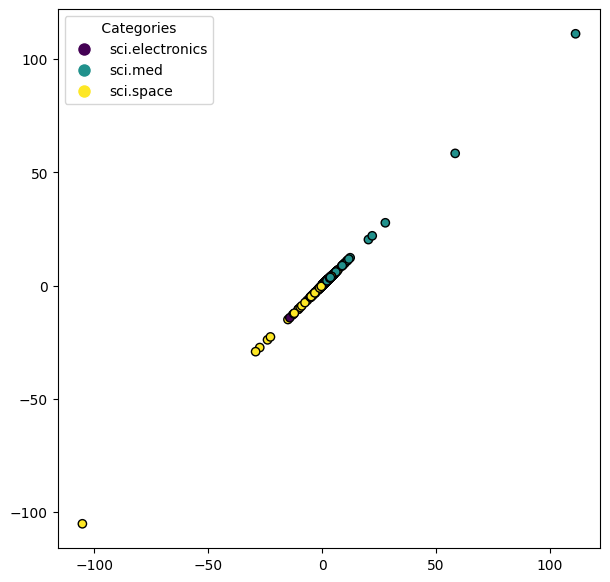

In [ ]:
def plot_1D(comp):
    plt.figure(figsize=(7,7))
    legend_labels = {i:name for i, name in enumerate(newsgroups.target_names)}
    plt.legend(handles = handles , title =" Categories ")
    scatter = plt.scatter (reduced_matrix[:,comp],reduced_matrix [:,comp], c=newsgroups.target, cmap ='viridis', edgecolor='k')

plot_1D(3)


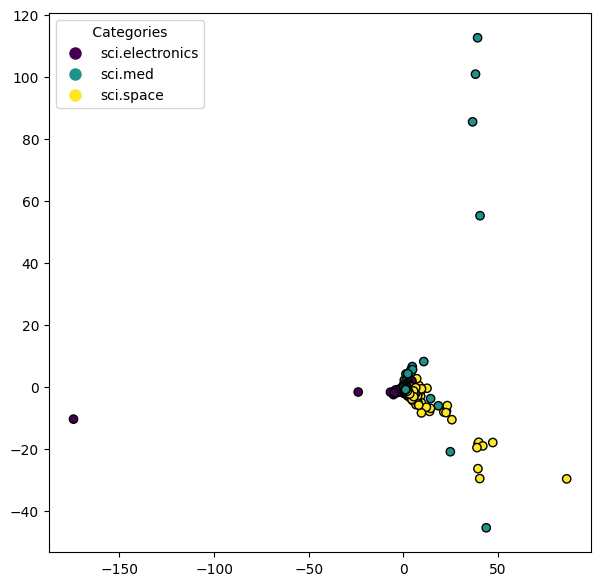

In [ ]:
def plot_2D (comp1, comp2):
    plt.figure(figsize=(7,7))
    legend_labels = {i:name for i, name in enumerate(newsgroups.target_names)}
    plt.legend(handles = handles , title =" Categories ")
    scatter = plt.scatter (reduced_matrix[:,comp1],reduced_matrix [:,comp2], c=newsgroups.target, cmap ='viridis', edgecolor='k')

plot_2D(1,2)


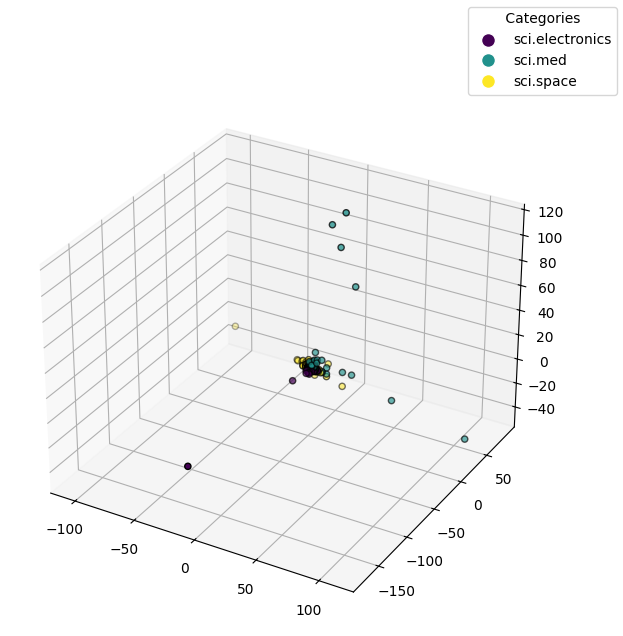

In [ ]:
def plot_3D(comp1,comp2,comp3) :

  X = reduced_matrix[:,comp1]
  Y = reduced_matrix[:,comp2]
  Z = reduced_matrix[:,comp3]

  fig = plt.figure(figsize=(7,7))
  legend_labels = {i:name for i, name in enumerate(newsgroups.target_names)}
  fig.legend(handles = handles , title =" Categories ")
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(X, Y, Z, c=newsgroups.target, cmap='viridis', edgecolor='k')

plot_3D (3,1,2)

In [ ]:
newsgroups = fetch_20newsgroups ( subset ='train', categories = categories , remove =( 'headers', 'footers', 'quotes') )


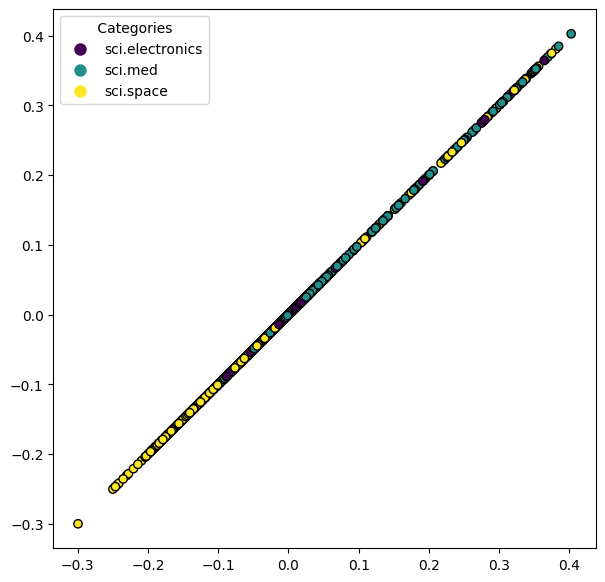

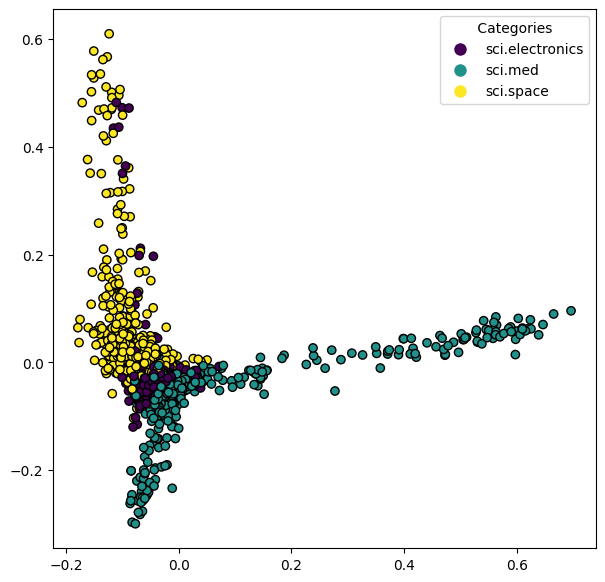

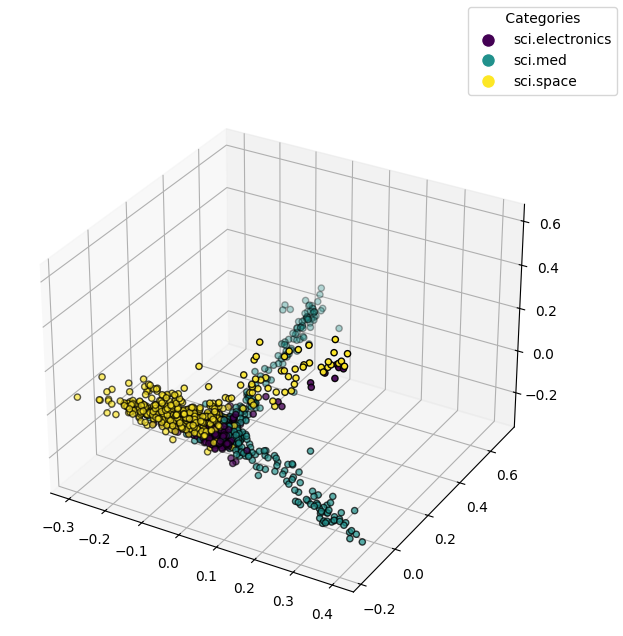

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Calculer la matrice TF-IDF
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(doc_term_matrix)


svd_model = TruncatedSVD(n_components=500, random_state=42)
reduced_matrix = svd_model.fit_transform(tfidf_matrix)

plot_1D(3)
plot_2D(1,2)
plot_3D(3,1,2)
